##Introduction


This notebook contains the first case study of Google's Data Analytics Professional Certificate. The case study requires the analyst to follow to the steps of the data analysis process (ask, prepare, process, analyze, share,and act) for a dataset that represents a fictional company (Cyclistic Bike-Share). 

##Ask

Cyclistic Bike-Share's business task is to maximize the number of annual memberships by converting casual customers (single-ride and day passes) to members (annual membership). The goal of this data analysis is to understand how casual riders and annual members use Cyclistic bikes differently. As for deliverables, we will make three recommendations to increase our annual membership.

##Prepare

The datasets contain data of rides from Q2 2019 to Q1 2020. Each rides contains basic information such as the start date and time, end date and time, and whether the customer was a casual user or a member. 

In [1]:
#install packages 
library(tidyverse)  
library(lubridate)  
library(ggplot2)  

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#import datasets
q2_2019 <- read_csv("../input/divvy-data-q219-q120/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("../input/divvy-data-q219-q120/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("../input/divvy-data-q219-q120/Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("../input/divvy-data-q219-q120/Divvy_Trips_2020_Q1.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  `01 - Rental Details Rental ID` = col_double(),
  `01 - Rental Details Local Start Time` = col_datetime(format = ""),
  `01 - Rental Details Local End Time` = col_datetime(format = ""),
  `01 - Rental Details Bike ID` = col_double(),
  `01 - Rental Details Duration In Seconds Uncapped` = col_number(),
  `03 - Rental Start Station ID` = col_double(),
  `03 - Rental Start Station Name` = col_character(),
  `02 - Rental End Station ID` = col_double(),
  `02 - Rental End Station Name` = col_character(),
  `User Type` = col_character(),
  `Member Gender` = col_character(),
  `05 - Member Details Member Birthday Year` = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  trip_id = col_double(),
  start_time = col_datetime(format = ""),
  end_time = col_datetime(format = ""),
  bikeid = col_double(),
  tripduration = col_number(),
  from_station_id =

##Process

First, we need to examine the column names before we unite the four datasets. This is important because all column names must be the same in order to unit the data frames successfully.

In [3]:
colnames(q3_2019)
colnames(q4_2019)
colnames(q2_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

Because some data frames have different names for the same column, we need to rename columns to make them consisten with q1_2020.

In [4]:
(q4_2019 <- rename(q4_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q3_2019 <- rename(q3_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q2_2019 <- rename(q2_2019
                   ,ride_id = "01 - Rental Details Rental ID"
                   ,rideable_type = "01 - Rental Details Bike ID" 
                   ,started_at = "01 - Rental Details Local Start Time"  
                   ,ended_at = "01 - Rental Details Local End Time"  
                   ,start_station_name = "03 - Rental Start Station Name" 
                   ,start_station_id = "03 - Rental Start Station ID"
                   ,end_station_name = "02 - Rental End Station Name" 
                   ,end_station_id = "02 - Rental End Station ID"
                   ,member_casual = "User Type"))

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994
25223646,2019-10-01 00:04:52,2019-10-01 00:22:45,1061,1072,84,Milwaukee Ave & Grand Ave,142,McClurg Ct & Erie St,Subscriber,Female,1991
25223647,2019-10-01 00:04:57,2019-10-01 00:29:16,1274,1458,156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Male,1995
25223648,2019-10-01 00:05:20,2019-10-01 00:29:18,6011,1437,156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Female,1993


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NA,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990
23479394,2019-07-01 00:02:24,2019-07-01 00:23:12,3770,1248,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479395,2019-07-01 00:02:26,2019-07-01 00:28:16,5442,1550,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479396,2019-07-01 00:02:34,2019-07-01 00:28:57,2957,1583,43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,NA,NA


ride_id,started_at,ended_at,rideable_type,01 - Rental Details Duration In Seconds Uncapped,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,Member Gender,05 - Member Details Member Birthday Year
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999
22178535,2019-04-01 00:26:33,2019-04-01 00:35:41,6418,548,503,Drake Ave & Fullerton Ave,500,Central Park Ave & Elbridge Ave,Subscriber,Male,1969
22178536,2019-04-01 00:29:48,2019-04-01 00:36:11,4513,383,260,Kedzie Ave & Milwaukee Ave,499,Kosciuszko Park,Subscriber,Male,1991
22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,2137,211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,NA,NA


Next, we need to examine the data types of each column to ensure all the data is correctly formted.

In [5]:
str(q1_2020)
str(q4_2019)
str(q3_2019)
str(q2_2019)

spec_tbl_df[,13] [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...

We need to convert ride_id and rideable_type to character so we can peform calucations correctly later on.

In [6]:
q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 


Now, we will unite the data frames into one data frame.

In [7]:
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

After 2020, some of the columns such as the lat, long, birthyear, and gender fields were dropped, so we will remove these coloumns to ensure every ride has the same data.

In [8]:
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender, "01 - Rental Details Duration In Seconds Uncapped", "05 - Member Details Member Birthday Year", "Member Gender", "tripduration"))

##Process

The next step is to clean the data. This step is crucial to ensure the data is accurate and calcuations can be carried out later on.

After inspecting our data frame, we have identified a few issues with the data frame. First, the customer type in the member_casual column has two names for members ("member" and "Subscriber") and two names for casual customers ("Customer" and "casual")

In [9]:
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))


Next, we will add columns that list the date, month, day, and year of each ride. This will allow us to aggregate ride data for each month, day, or year.


In [10]:
all_trips$date <- as.Date(all_trips$started_at) 
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")


Now, we will add a column for the ride length for each ride by finding the time difference between the ride's start time and end time.

In [11]:
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)


There is some "bad" data to remove where the ride_length is negative due to maintence removing bikes for quality checks. We will create a new data frame without these rides that have negative ride lengths.


In [12]:
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

##Analyze

We will now perform a descriptive analysis of the data to find patterns between casual customer and members. 

Before we start the analysis, it is good practice to look at basic desciptive statistics of our data.

In [13]:
mean(all_trips_v2$ride_length)
median(all_trips_v2$ride_length) 
max(all_trips_v2$ride_length) 
min(all_trips_v2$ride_length) 

Time difference of 1479.139 secs

Time difference of 712 secs

Time difference of 9387024 secs

Time difference of 1 secs

First, we will compare the ride statistics of our casual customer and members.

In [14]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<drtn>
casual,3552.7502
member,850.0662


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<drtn>
casual,1546
member,589


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<drtn>
casual,9387024
member,9056634


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<drtn>
casual,2
member,1


Before we move forward, let's order the day_of_week column into the correct order.

In [15]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

Next, we will examine the average ride time by each day for casual customers and members.

In [16]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<drtn>
casual,Sunday,3581.4054
member,Sunday,919.9746
casual,Monday,3372.2869
member,Monday,842.5726
casual,Tuesday,3596.3599
member,Tuesday,826.1427
casual,Wednesday,3718.6619
member,Wednesday,823.9996
casual,Thursday,3682.9847


Now, we wil look at the total number of rides and the average ride duration (in seconds) by weekday for casual csutomers and members.

In [17]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  
  group_by(member_casual, weekday) %>%  
  summarise(number_of_rides = n(),average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<drtn>
casual,Sun,181293,3581.4054 secs
casual,Mon,103296,3372.2869 secs
casual,Tue,90510,3596.3599 secs
casual,Wed,92457,3718.6619 secs
casual,Thu,102679,3682.9847 secs
casual,Fri,122404,3773.8351 secs
casual,Sat,209543,3331.9138 secs
member,Sun,267965,919.9746 secs
member,Mon,472196,842.5726 secs


##Share

Before we make our recommendations for the marketing department, we will create some data visualizations to both share with our stakeholders as well as give us a better idea of what insights to share.

The first data visualization will reveal the number of rides by weekday for casual customer and members.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



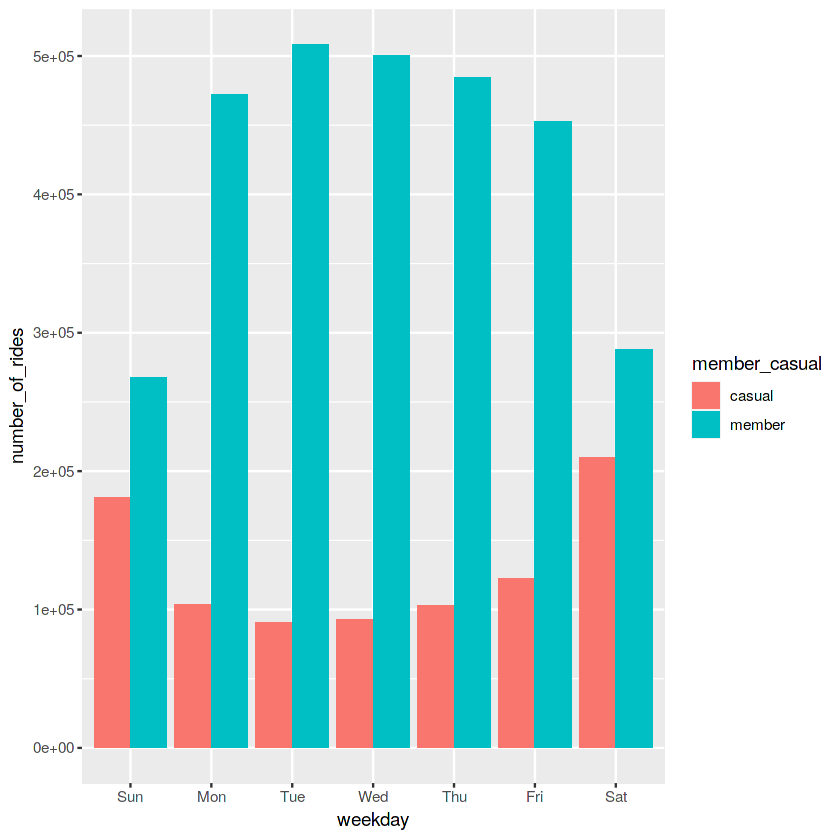

In [18]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

Our next data visualization will show the average ride length by weekday for casual customers and members.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



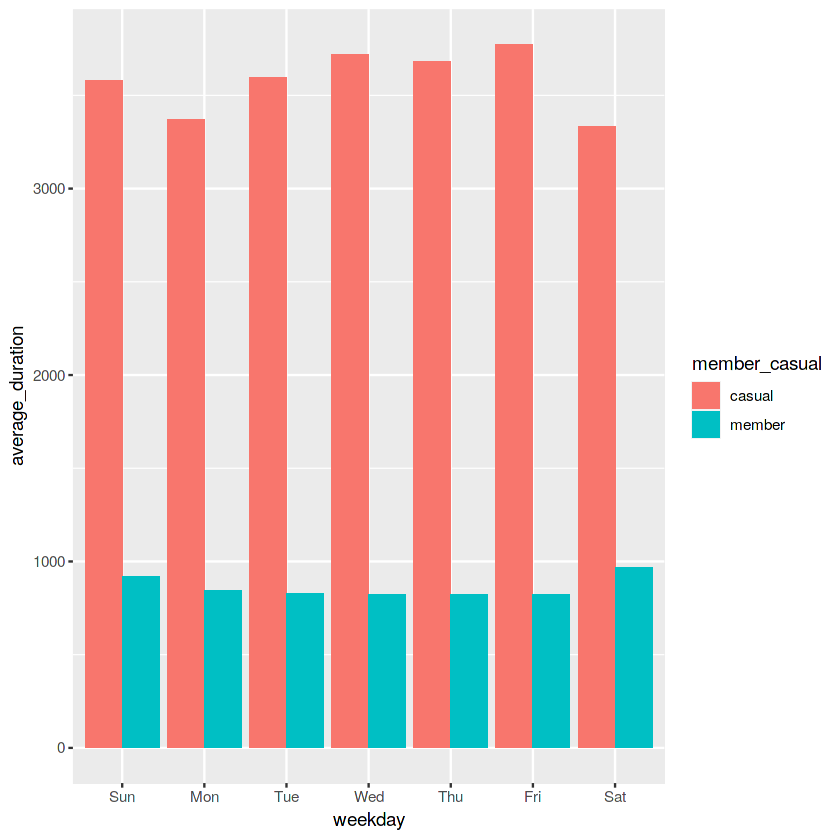

In [19]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

We will now create several datasets as .csv files to create visualizations in Tableau. 

In [20]:
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = '~/Desktop/avg_ride_length.csv')

counts2 <- aggregate(all_trips_v2$ride_id ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = length)
write.csv(counts2, file = '~/Desktop/num_of_rides_by_day.csv')

counts3 <- aggregate(all_trips_v2$ride_id ~ all_trips_v2$member_casual + all_trips_v2$month, FUN = length)
write.csv(counts3, file = '~/Desktop/num_of_rides_by_month.csv')

Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file '/root/Desktop/avg_ride_length.csv': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


##Act

For the last step in the data analysis process, we will make three recomendations to increase our annual membership. But first, we will make three key insights. 

###Key Findings:
1. Our casual customers take the most rides of the weekends. Conversely, our members customers take the most rides during the week.
2. On average, our members take shorter rides than our casual customers.
3. There was no difference between casual customer and members in how many rides they took each month. Both casual customers and members take the most number of rides in the summer months and the least number of rides in the late winter and early spring. 

###Recommendations
1. Advertise how a membership can save money for those customers who take longer rides.
2. Target casual customers who rent a bike for leisure on their weekends. 
3. Create a large summer campaign when more people are likely to rent a bike. 